In [478]:
#Imports

# Data management
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import collections

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  
#########  KNN For Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import multiprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [435]:
# Data Input

# El dataSet empleado puede encontrarse https://archive.ics.uci.edu/ml/datasets/bank+marketing
# Se ha empleado la versión de bank-additional.csv que tiene (4119) ejemplos del dataset original y 20 variables de entrada


data = pd.read_csv("bank-additional.csv", sep=";")
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


# Inspección de los datos
- Representación gráfica por pares 
- ¿Está balanceado el dataset?
- Correlación variables numéricas
- Histogramas de las variables categóricas (aquellas que no se van a eliminar)

In [436]:
# En primer lugar, vamos a ver cuantas variables son categóricas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

Hay 11 variables tipo object, es decir, hay 11 variables categóricas

In [437]:
# Representamos las variables por pares
# sns_plot = sns.pairplot(data)
# sns_plot.figure.savefig("output.png")

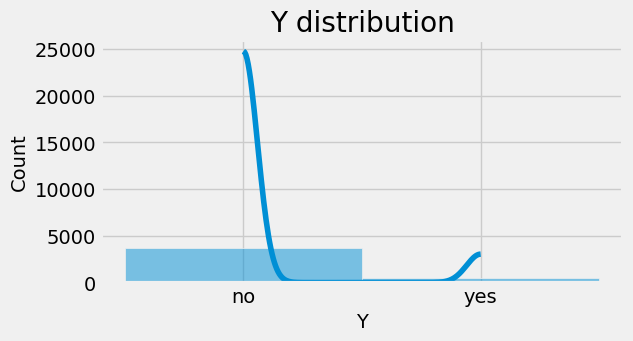

In [438]:
# Distribution of the output variable
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=data, x='y', kde=True, ax=ax)
ax.set_title("Y distribution")
ax.set_xlabel('Y');
# plt.savefig("Hist_y.jpg", bbox_inches='tight')

Count No: 3668
Count Yes 451


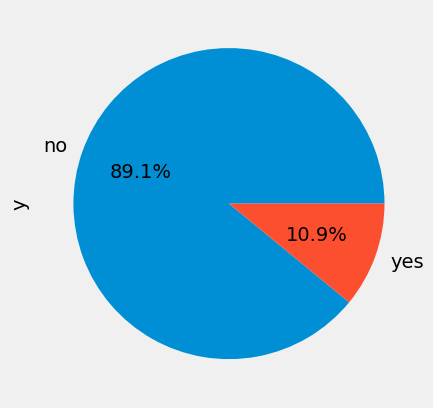

In [439]:
data["y"].value_counts().plot.pie(autopct= '%1.1f%%')
print("Count No:",sum(data["y"]=="no"))
print("Count Yes",sum(data["y"]=="yes"))

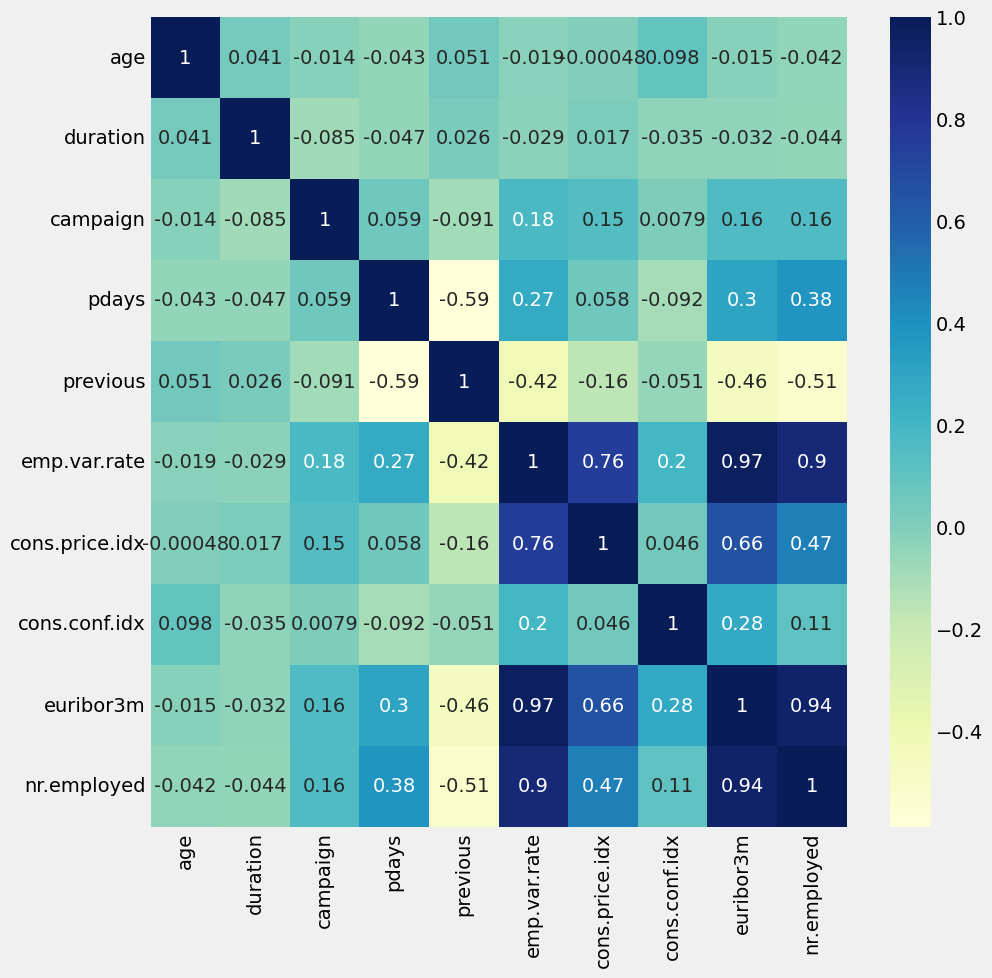

In [440]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
# plt.savefig("Correlaciones.jpg", bbox_inches='tight')
plt.show()


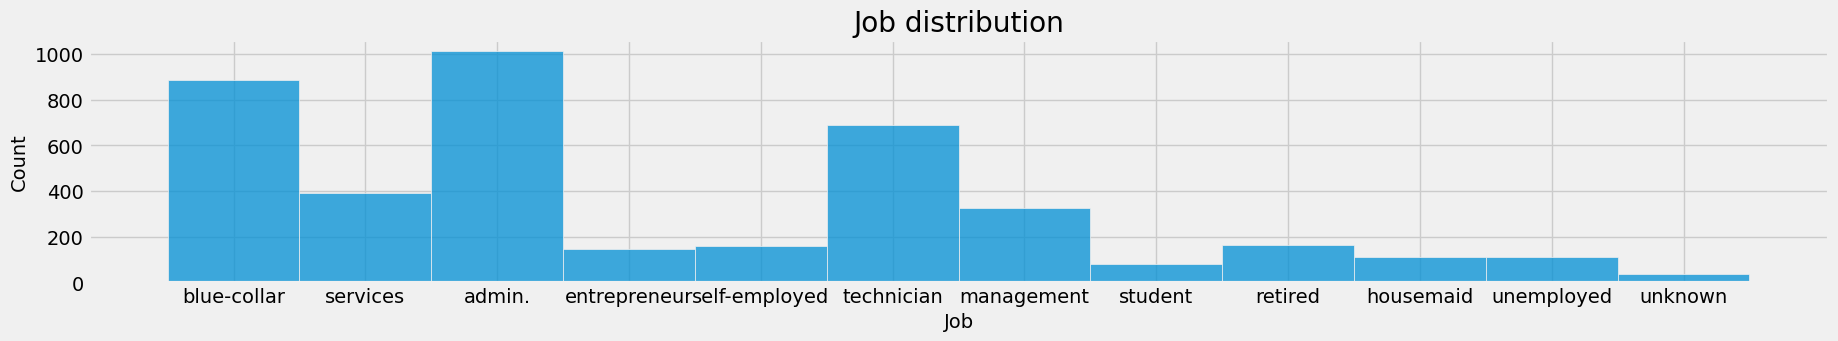

In [441]:
# Histogramas de las variables categóricas
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))
sns.histplot(data=data, x='job', kde=False, ax=ax)
ax.set_title("Job distribution")
ax.set_xlabel('Job');
# plt.savefig("Hist_job.jpg", bbox_inches='tight')

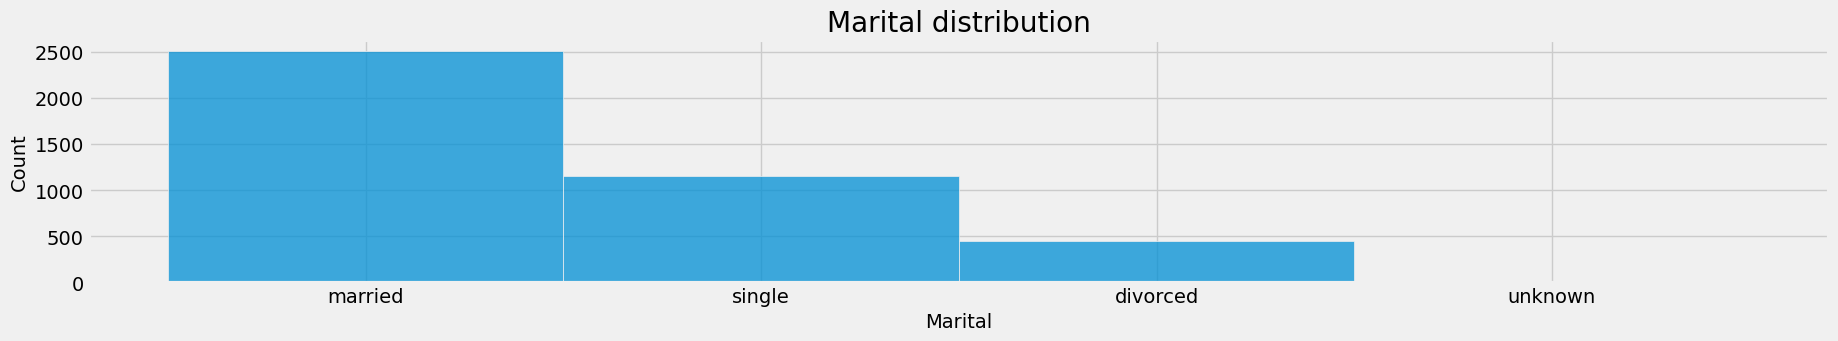

In [442]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))
sns.histplot(data=data, x='marital', kde=False, ax=ax)
ax.set_title("Marital distribution")
ax.set_xlabel('Marital');
# plt.savefig("Hist_Marital.jpg", bbox_inches='tight')

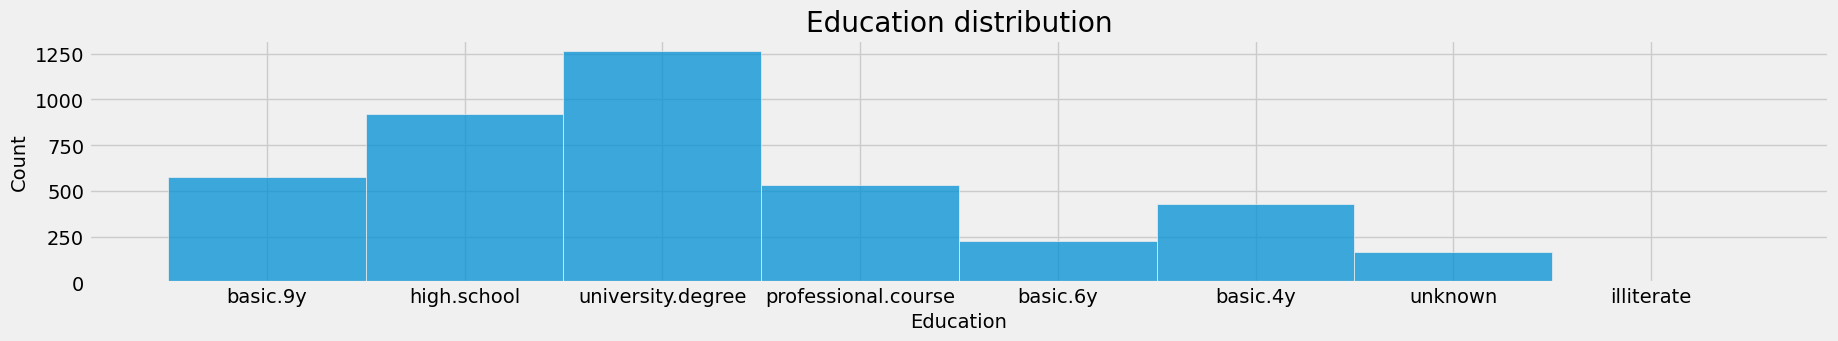

In [443]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))
sns.histplot(data=data, x='education', kde=False, ax=ax)
ax.set_title("Education distribution")
ax.set_xlabel('Education');
# plt.savefig("Hist_education.jpg", bbox_inches='tight')

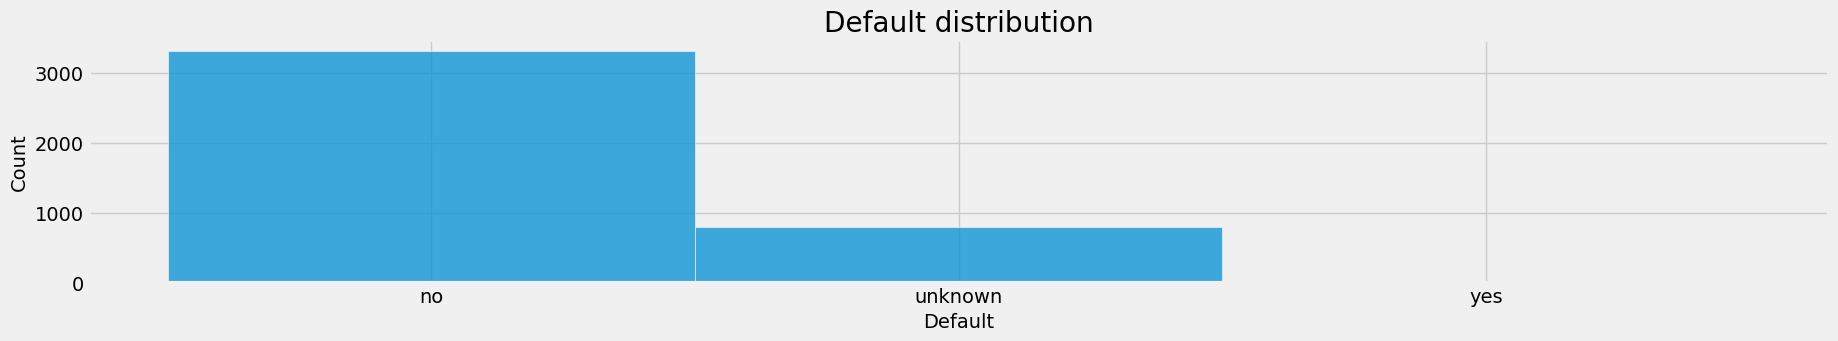

In [444]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))
sns.histplot(data=data, x='default', kde=False, ax=ax)
ax.set_title("Default distribution")
ax.set_xlabel('Default');
# plt.savefig("Hist_default.jpg", bbox_inches='tight')

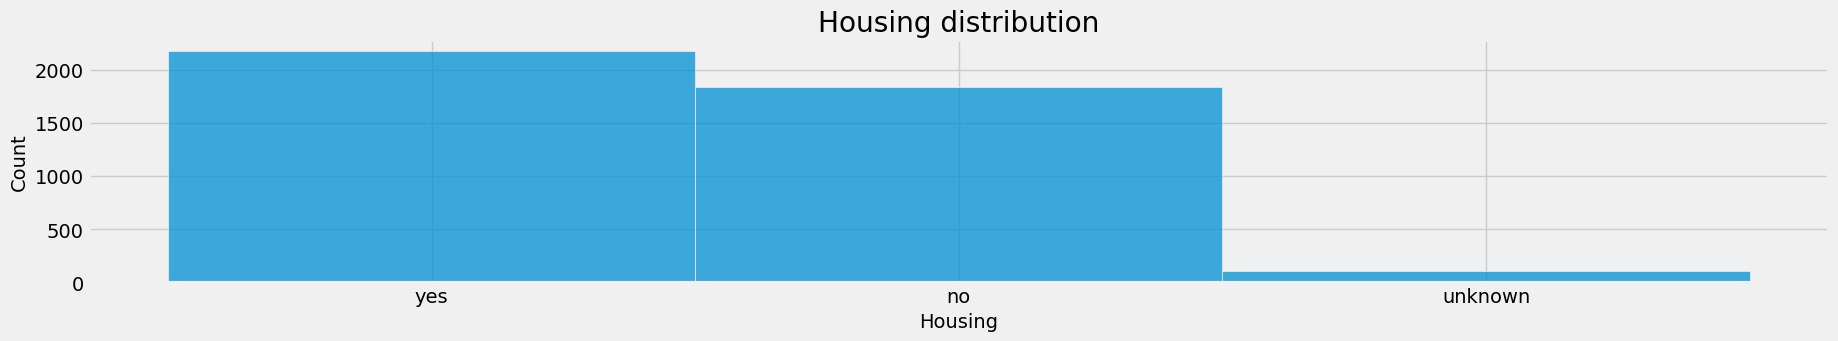

In [445]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))
sns.histplot(data=data, x='housing', kde=False, ax=ax)
ax.set_title("Housing distribution")
ax.set_xlabel('Housing');
# plt.savefig("Hist_housing.jpg", bbox_inches='tight')

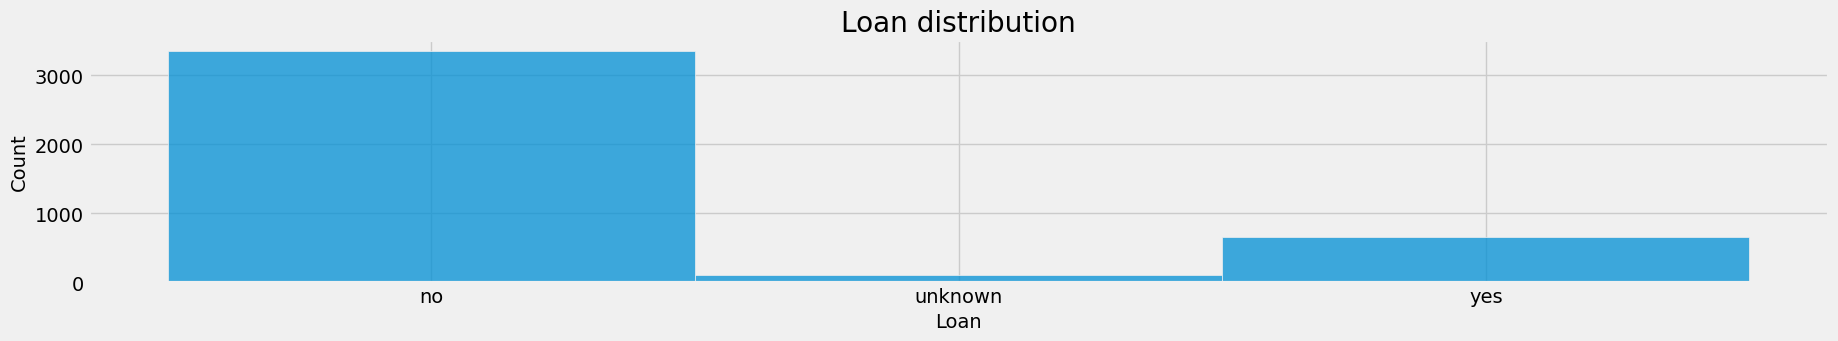

In [446]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))
sns.histplot(data=data, x='loan', kde=False, ax=ax)
ax.set_title("Loan distribution")
ax.set_xlabel('Loan');
# plt.savefig("Hist_loan.jpg", bbox_inches='tight')

# Limpieza y procesado de los datos
- Variables categóricas --> Transformamos 
- Normalización de los datos
- Separación entre conjunto de entrenamiento y de test
- Balanceo mediante SMOTE de X_train e y_train

In [447]:
# En primer lugar, eliminamos aquellas variables que no queremos que formen parte del modelo.
# Eliminamos las relativas al mes, día y medio de contacto.
data_modified= data.drop(["month", "day_of_week", "contact", "duration", "emp.var.rate","nr.employed"], axis=1, inplace=False)
data_modified.info()
#Empleamos dummies para las variables categóricas
data_modified = pd.get_dummies(data_modified, drop_first= True)
data_modified.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   campaign        4119 non-null   int64  
 8   pdays           4119 non-null   int64  
 9   previous        4119 non-null   int64  
 10  poutcome        4119 non-null   object 
 11  cons.price.idx  4119 non-null   float64
 12  cons.conf.idx   4119 non-null   float64
 13  euribor3m       4119 non-null   float64
 14  y               4119 non-null   object 
dtypes: float64(3), int64(4), object(8)
memory usage: 482.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 

In [448]:

# Normalizamos las variables:

scaler = preprocessing.MinMaxScaler() #feature_range=(0, 2) insise parenthesis if a different scale is needed
names = data_modified.columns  # collecting names of columns
d = scaler.fit_transform(data_modified)  # transforming data to normalized
data_norm = pd.DataFrame(d, columns=names) # creation of dataframe normalized 
data_norm.head()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,...,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success,y_yes
0,0.171429,0.029412,1.0,0.0,0.269680,0.192469,0.153741,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.300000,0.088235,1.0,0.0,0.698753,0.602510,0.956916,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.100000,0.000000,1.0,0.0,0.882307,0.376569,0.981179,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.285714,0.058824,1.0,0.0,0.882307,0.376569,0.980499,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.414286,0.000000,1.0,0.0,0.389322,0.368201,0.806349,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [449]:
# Una vez se ha tratado las variables categóricas y se han normalizado los datos se crean los conjuntos
# de train y test

# La variable target es y_yes
X = data_norm.loc[:, data_norm.columns != 'y_yes']  # Excluding column Creditabitability
y = data_norm['y_yes']
# Division entre conjunto de entrenamiento y conjunto de test
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        #y.values.reshape(-1,1),
                                        y,
                                        train_size   = 0.7,  # 70% for training
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [450]:
# Dado que la variable de salida y_yes no está balanceada como hemos visto antes, se va a emplear SMOTE para oversample del 
# conjunto de entrenamiento



print("Before Over Sampling, count of the label '1': {}".format(sum(y_train == 1)))  
print("Before Over Sampling, count of the label '0': {} \n".format(sum(y_train == 0)))  
from imblearn.over_sampling import SMOTE  

sm1 = SMOTE(sampling_strategy=0.5, random_state = 2, k_neighbors=5)  


X_train_res, y_train_res = sm1.fit_resample(X_train, y_train.ravel())  
print('After Over Sampling, the shape of the train_X: {}'.format(X_train_res.shape))  
print('After Over Sampling, the shape of the train_y: {} \n'.format(y_train_res.shape))  
print("After Over Sampling, count of the label '1': {}".format(sum(y_train_res == 1)))  
print("After Over Sampling, count of the label '0': {}".format(sum(y_train_res == 0)))  

Before Over Sampling, count of the label '1': 320
Before Over Sampling, count of the label '0': 2563 

After Over Sampling, the shape of the train_X: (3844, 36)
After Over Sampling, the shape of the train_y: (3844,) 

After Over Sampling, count of the label '1': 1281
After Over Sampling, count of the label '0': 2563


# Análisis de clasificación
- KNN
- Random Forest
- Boosting
- MLP

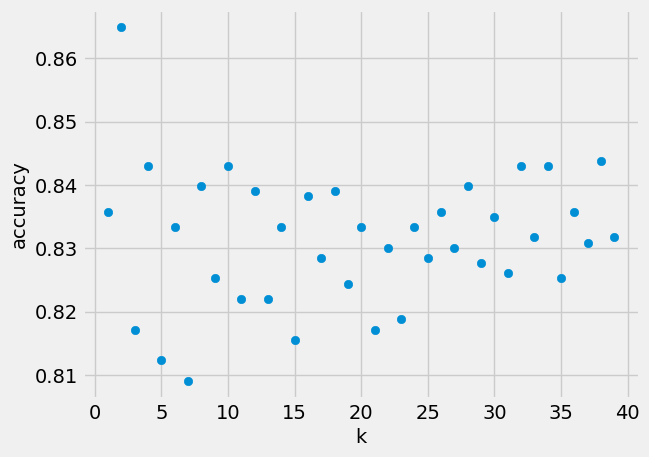

In [468]:
### KNN ###
# SDelection of optimum K
k_range = range(1, 40)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_res, y_train_res)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20, 25, 30, 35, 40])


In [470]:
print(scores.index(max(scores))+1)

2


In [472]:
n_neighbors = 2
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train_res, y_train_res)
#TRAIN
print("TRAINING")
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_res, y_train_res)))
pred = knn.predict(X_train_res)
print(confusion_matrix(y_train_res, pred))
pred = knn.predict(X_test)
#TEST
print("TEST")
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

TRAINING
Accuracy of K-NN classifier on training set: 0.97
[[2563    0]
 [ 102 1179]]
TEST
Accuracy of K-NN classifier on test set: 0.86
[[1040   65]
 [ 102   29]]
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93      1105
         1.0       0.31      0.22      0.26       131

    accuracy                           0.86      1236
   macro avg       0.61      0.58      0.59      1236
weighted avg       0.85      0.86      0.85      1236



In [454]:
### RANDOM FOREST
#Buscando hiperparámetros 
# Grid to find hiperparameters
# ==============================================================================




param_grid = ParameterGrid(
                {'n_estimators': [50, 100, 150,250,500],
                 'max_features': [5, 10, 15, 20, 25, 35],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
results = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    model = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    model.fit(X_train_res, y_train_res)
    
    results['params'].append(params)
    results['oob_accuracy'].append(model.oob_score_)
    print(f"Model: {params} \u2713")

# Results
# ==============================================================================
results = pd.DataFrame(results)
results = pd.concat([results, results['params'].apply(pd.Series)], axis=1)
results = results.sort_values('oob_accuracy', ascending=False)
results = results.drop(columns = 'params')
results.head(10)

Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 50} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 100} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 250} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 500} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'n_estimators': 50} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'n_estimators': 100} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'n_estimators': 150} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'n_estimators': 250} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'n_estimators': 500} ✓
Model: {'criterion': 'gini', 'max_depth': None, 'max_features': 15, 'n_estimators': 50} ✓
Model: 

,oob_accuracy,criterion,max_depth,max_features,n_estimators
124,0.926899,entropy,NaN,5,500
4,0.926119,gini,NaN,5,500
3,0.925338,gini,NaN,5,250
2,0.924298,gini,NaN,5,150
94,0.924298,gini,20.0,5,500
123,0.924037,entropy,NaN,5,250
128,0.923777,entropy,NaN,10,250
127,0.923517,entropy,NaN,10,150
122,0.922737,entropy,NaN,5,150
92,0.922737,gini,20.0,5,150


In [455]:
# Better hyperparameters using out-of-bag error
# ==============================================================================
print("--------------------------------------------------")
print("Better hyperparameters found (oob-accuracy)")
print("--------------------------------------------------")
print(results.iloc[0,:], ":", results.iloc[0,:]['oob_accuracy'], "accuracy")

--------------------------------------------------
Better hyperparameters found (oob-accuracy)
--------------------------------------------------
oob_accuracy    0.926899
criterion        entropy
max_depth            NaN
max_features           5
n_estimators         500
Name: 124, dtype: object : 0.9268990634755463 accuracy


In [456]:
# Grid search based on cross-validation
# ==============================================================================


param_grid = {'n_estimators': [50, 100, 150,250,500],
              'max_features': [5, 10, 15, 20, 25, 35],
              'max_depth'   : [None, 3, 10, 20],
              'criterion'   : ['gini', 'entropy']
             }

# grid search by CV
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 1,
        return_train_score = True
       )

grid.fit(X = X_train_res, y = y_train_res)

# Resultados
# ==============================================================================
results_cv = pd.DataFrame(grid.cv_results_)
results_cv.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

Fitting 15 folds for each of 240 candidates, totalling 3600 fits


,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
124,entropy,None,5,500,0.919008,0.007054,0.999783,0.000153
4,gini,None,5,500,0.918488,0.006133,0.999783,0.000153
3,gini,None,5,250,0.917881,0.005753,0.999783,0.000153
2,gini,None,5,150,0.917794,0.006767,0.999783,0.000153


In [457]:
# Better hyperparameters using cv and out-of-bag error
# ==============================================================================
print("----------------------------------------")
print("Better hyperparameters found (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Better hyperparameters found (cv)
----------------------------------------
{'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'n_estimators': 500} : 0.9190077075205896 accuracy


In [458]:
model_final_RF=RandomForestClassifier(criterion="entropy", max_depth = None, max_features = 5, n_estimators = 500)
model_final_RF.fit(X_train_res, y_train_res)

RandomForestClassifier(criterion='entropy', max_features=5, n_estimators=500)

In [459]:
# Model training error
#-------------------------------------------------------------------------------
predictions_train = model_final_RF.predict(X = X_train_res,)

print("Confussion Matrix -- TRAIN")
print("-------------------")
confusion_matrix(
    y_true    = y_train_res,
    y_pred    = predictions_train
)

Confussion Matrix -- TRAIN
-------------------


array([[2563,    0],
       [   1, 1280]], dtype=int64)

In [460]:
accuracy_train = accuracy_score(
            y_true    = y_train_res,
            y_pred    = predictions_train,
            normalize = True
           )
#print(f"Accuracy in train : {100 * accuracy_train} %")
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))


 Accuracy in train 1s: 99.97 %


In [461]:
# Model test error
#-------------------------------------------------------------------------------
predictions_test = model_final_RF.predict(X = X_test,)

print("Confussion Matrix -- TEST")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predictions_test
)

Confussion Matrix -- TEST
-------------------


array([[1068,   37],
       [  97,   34]], dtype=int64)

In [462]:
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_test,
            normalize = True
           )
#print(f"Accuracy in test 1s: {100 * accuracy_test} %")

print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))


 Accuracy in test 1s: 89.16 %


In [463]:
print(
    classification_report(
        y_true = y_test,
        y_pred = predictions_test
    )
)

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      1105
         1.0       0.48      0.26      0.34       131

    accuracy                           0.89      1236
   macro avg       0.70      0.61      0.64      1236
weighted avg       0.87      0.89      0.88      1236



In [513]:
importance_predictors = pd.DataFrame(
                            {'predictor': X_train_res.columns,
                             'importance': model_final_RF.feature_importances_}
                            )
print("Importance  of the model predictors")
print("-------------------------------------------")
importance_predictors.sort_values('importance', ascending=False)

Importance  of the model predictors
-------------------------------------------


,predictor,importance
6,euribor3m,0.184281
5,cons.conf.idx,0.134309
4,cons.price.idx,0.102434
0,age,0.097600
1,campaign,0.090821
31,housing_yes,0.033654
3,previous,0.029236
2,pdays,0.028130
28,default_unknown,0.025576
35,poutcome_success,0.022406


In [466]:
#GRADIENT BOOSTING

# Grid to find hiperparameters
# ==============================================================================


# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'  : [50, 100, 500, 1000],
              'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [None, 1, 3, 5, 10, 20],
              'subsample'     : [0.5, 1],
              'learning_rate' : [0.001, 0.01, 0.1]
             }

# Grid search using CV
# ==============================================================================
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train_res, y = y_train_res)

# Results
# ==============================================================================
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)



,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
395,0.1,10,sqrt,100,1,0.923517,0.003187,0.99987,0.000184
407,0.1,10,log2,1000,1,0.922737,0.002277,0.99987,0.000184
255,0.01,10,sqrt,1000,1,0.922477,0.001443,0.99987,0.000184
429,0.1,20,log2,500,1,0.922217,0.000952,0.99987,0.000184
431,0.1,20,log2,1000,1,0.921436,0.001601,0.99987,0.000184
397,0.1,10,sqrt,500,1,0.921436,0.000354,0.99987,0.000184
254,0.01,10,sqrt,1000,0.5,0.921177,0.004435,0.99935,0.000184
310,0.1,None,log2,1000,0.5,0.920918,0.005993,0.99987,0.000184
405,0.1,10,log2,500,1,0.920916,0.002395,0.99987,0.000184
399,0.1,10,sqrt,1000,1,0.920915,0.002059,0.99987,0.000184


In [ ]:
# Better hyperparameters using out-of-bag error
# ==============================================================================
print("--------------------------------------------------")
print("Better hyperparameters found")
print("--------------------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

In [516]:
model_final_boosting = GradientBoostingClassifier(learning_rate=0.1, max_depth=10, max_features="sqrt", n_estimators=100, subsample=1)
model_final_boosting.fit(X_train_res, y_train_res)


GradientBoostingClassifier(max_depth=10, max_features='sqrt', subsample=1)

In [524]:
# Model training error
#-------------------------------------------------------------------------------
predictions_train = model_final_boosting.predict(X = X_train_res,)

print("Confussion Matrix -- TRAIN")
print("-------------------")
confusion_matrix(
    y_true    = y_train_res,
    y_pred    = predictions_train
)

Confussion Matrix -- TRAIN
-------------------


array([[2563,    0],
       [   5, 1276]], dtype=int64)

In [525]:
accuracy_train = accuracy_score(
            y_true    = y_train_res,
            y_pred    = predictions_train,
            normalize = True
           )
#print(f"Accuracy in train : {100 * accuracy_train} %")
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))


 Accuracy in train 1s: 99.87 %


In [526]:
# Model test error
#-------------------------------------------------------------------------------
predictions_test = model_final_boosting.predict(X = X_test,)

print("Confussion Matrix -- TEST")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predictions_test
)

Confussion Matrix -- TEST
-------------------


array([[1068,   37],
       [  98,   33]], dtype=int64)

In [527]:
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_test,
            normalize = True
           )
#print(f"Accuracy in test 1s: {100 * accuracy_test} %")

print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))


 Accuracy in test 1s: 89.08 %


In [528]:

print(
    classification_report(
        y_true = y_test,
        y_pred = predictions_test
    )
)

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      1105
         1.0       0.47      0.25      0.33       131

    accuracy                           0.89      1236
   macro avg       0.69      0.61      0.63      1236
weighted avg       0.87      0.89      0.88      1236



In [529]:
importance_predictors = pd.DataFrame(
                            {'predictor': X_train_res.columns,
                             'importance': model_final_boosting.feature_importances_}
                            )
print("Importance  of the model predictors")
print("-------------------------------------------")
importance_predictors.sort_values('importance', ascending=False)

Importance  of the model predictors
-------------------------------------------


,predictor,importance
6,euribor3m,0.240130
5,cons.conf.idx,0.124997
4,cons.price.idx,0.115610
1,campaign,0.093394
0,age,0.072718
2,pdays,0.038588
34,poutcome_nonexistent,0.036682
28,default_unknown,0.030386
31,housing_yes,0.027743
35,poutcome_success,0.021286


In [501]:
### MLP
# space search of each hyperparameter
# ==============================================================================
param_distributions = {
    'hidden_layer_sizes': [(10), (10, 10), (20, 20),(38, 10, 2)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = MLPClassifier(solver = 'adam', max_iter= 2000),
        param_distributions = param_distributions,
        n_iter     = 50, # Maximum number of combinations tested
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 3, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train_res, y = y_train_res)

# Resultados del grid
# ==============================================================================
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
42,0.01,"(38, 10, 2)",0.001,0.846520,0.022056,0.937306,0.014442
17,0.01,"(20, 20)",0.01,0.834815,0.024975,0.939128,0.012747
41,0.01,"(38, 10, 2)",0.01,0.832734,0.021978,0.927161,0.010068
39,0.001,"(20, 20)",0.01,0.829872,0.019840,0.932755,0.019162
8,0.01,"(20, 20)",0.1,0.829612,0.020801,0.920398,0.016911
34,0.001,"(20, 20)",0.001,0.828308,0.013368,0.931975,0.020367
11,0.001,"(38, 10, 2)",1.0,0.818685,0.018666,0.874480,0.008631
32,0.01,"(10, 10)",0.01,0.809585,0.031739,0.882934,0.002543
47,0.001,"(20, 20)",1.0,0.804375,0.012254,0.836890,0.008457
24,0.01,10,0.001,0.802552,0.007651,0.863947,0.017846


In [502]:
# best model selected

model_final_MLP = grid.best_estimator_
model_final_MLP



MLPClassifier(alpha=0.001, hidden_layer_sizes=(38, 10, 2),
              learning_rate_init=0.01, max_iter=2000)

In [503]:
prediction_train= model_final_MLP.predict(X_train_res)
print("Confussion Matrix -- TRAIN")
print("-------------------")
confusion_matrix(
    y_true    = y_train_res,
    y_pred    = predictions_train
)


Confussion Matrix -- TRAIN
-------------------


array([[2563,    0],
       [   1, 1280]], dtype=int64)

In [504]:
accuracy_train = accuracy_score(
            y_true    = y_train_res,
            y_pred    = predictions_train,
            normalize = True
           )
#print(f"Accuracy in train : {100 * accuracy_train} %")
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))


 Accuracy in train 1s: 99.97 %


In [505]:
# Model test error
#-------------------------------------------------------------------------------
predictions_test = model_final_MLP.predict(X = X_test,)

print("Confussion Matrix -- TEST")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predictions_test
)

Confussion Matrix -- TEST
-------------------


array([[1105,    0],
       [ 131,    0]], dtype=int64)

In [506]:
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_test,
            normalize = True
           )
#print(f"Accuracy in test 1s: {100 * accuracy_test} %")

print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))


 Accuracy in test 1s: 89.40 %


In [507]:

print(
    classification_report(
        y_true = y_test,
        y_pred = predictions_test
    )
)

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      1105
         1.0       0.00      0.00      0.00       131

    accuracy                           0.89      1236
   macro avg       0.45      0.50      0.47      1236
weighted avg       0.80      0.89      0.84      1236



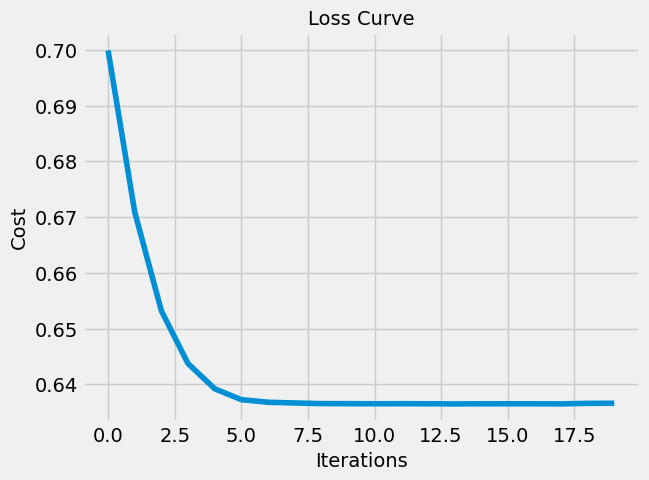

In [508]:
plt.plot(model_final_MLP.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [541]:
#Combinando todos los modelos
pred_knn=knn.predict(X_test)
pred_RF = model_final_RF.predict(X_test)
pred_Boosting = model_final_boosting.predict(X_test)
pred_MLP=model_final_MLP.predict(X_test)

combined_pred = np.round((pred_knn+pred_RF+pred_Boosting+pred_MLP)/4)
print(
    classification_report(
        y_true = y_test,
        y_pred = combined_pred
    )
)


              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1105
         1.0       0.61      0.15      0.24       131

    accuracy                           0.90      1236
   macro avg       0.76      0.57      0.60      1236
weighted avg       0.88      0.90      0.87      1236



# Análisis por clustering

- HC
- K-means

¿Diferencias de clusters entre algoritmos?
¿Que sectores se identifican?

In [547]:
# Para esta sección se van a emplear únicamente aquellas variables relativas a los datos de los clientes
data_clustering = data.iloc[:, 0:7]
data_clustering.head()

#Realizamos un tratamiento de las variables categóricas
X_clustering_mod = pd.get_dummies(data_clustering, drop_first= True)
scaler = preprocessing.MinMaxScaler() #feature_range=(0, 2) insise parenthesis if a different scale is needed
names = X_clustering_mod.columns  # collecting names of columns
d = scaler.fit_transform(X_clustering_mod)  # transforming data to normalized
X_clustering_norm = pd.DataFrame(d, columns=names) # creation of dataframe normalized 
X_clustering_norm.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4119 non-null   float64
 1   job_blue-collar                4119 non-null   float64
 2   job_entrepreneur               4119 non-null   float64
 3   job_housemaid                  4119 non-null   float64
 4   job_management                 4119 non-null   float64
 5   job_retired                    4119 non-null   float64
 6   job_self-employed              4119 non-null   float64
 7   job_services                   4119 non-null   float64
 8   job_student                    4119 non-null   float64
 9   job_technician                 4119 non-null   float64
 10  job_unemployed                 4119 non-null   float64
 11  job_unknown                    4119 non-null   float64
 12  marital_married                4119 non-null   f

## K MEANS

In [545]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_clustering_norm)
    distortions.append(kmeanModel.inertia_)

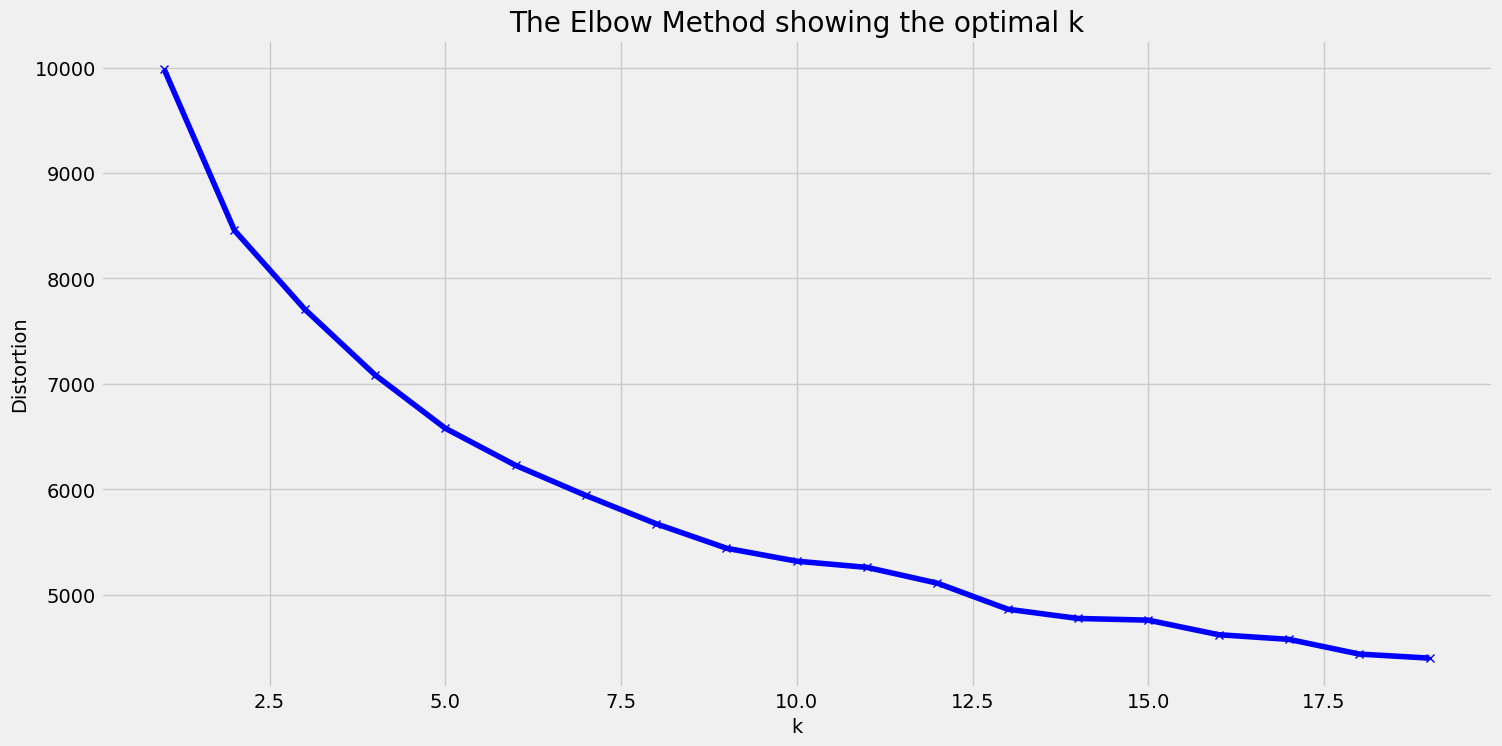

In [546]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [548]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(X_clustering_norm)
centroids = kmeanModel.cluster_centers_
print(centroids)

[[ 3.73086388e-01  5.78422484e-01  3.89845875e-02  5.53037171e-02
   4.35176791e-02  6.61831369e-02  3.08250227e-02  5.62103354e-02
   6.93889390e-18  2.44786945e-02  2.62919311e-02  2.08522212e-02
   9.01178604e-01  2.22044605e-16  9.06618314e-04  1.68631006e-01
   3.97098821e-01 -3.33066907e-16 -3.25260652e-19  3.35448776e-02
   4.44089210e-16  8.61287398e-02  3.44514959e-01 -3.25260652e-19
   2.90117860e-02  5.16772439e-01  2.90117860e-02  1.65004533e-01]
 [ 3.32292917e-01  2.10084034e-03  2.73109244e-02  1.47058824e-02
   1.26050420e-02  5.46218487e-02  1.68067227e-02  4.41176471e-02
   6.93889390e-18  7.50000000e-01  2.31092437e-02  4.20168067e-03
   6.57563025e-01  1.86974790e-01  1.73472348e-18  1.47058824e-02
   6.30252101e-03 -2.22044605e-16  1.62630326e-19  9.43277311e-01
  -5.55111512e-17  2.31092437e-02  1.09243697e-01  1.62630326e-19
   3.36134454e-02  5.50420168e-01  3.36134454e-02  1.53361345e-01]
 [ 3.26623377e-01  9.40438871e-02  2.50783699e-02  1.25391850e-02
   5.485

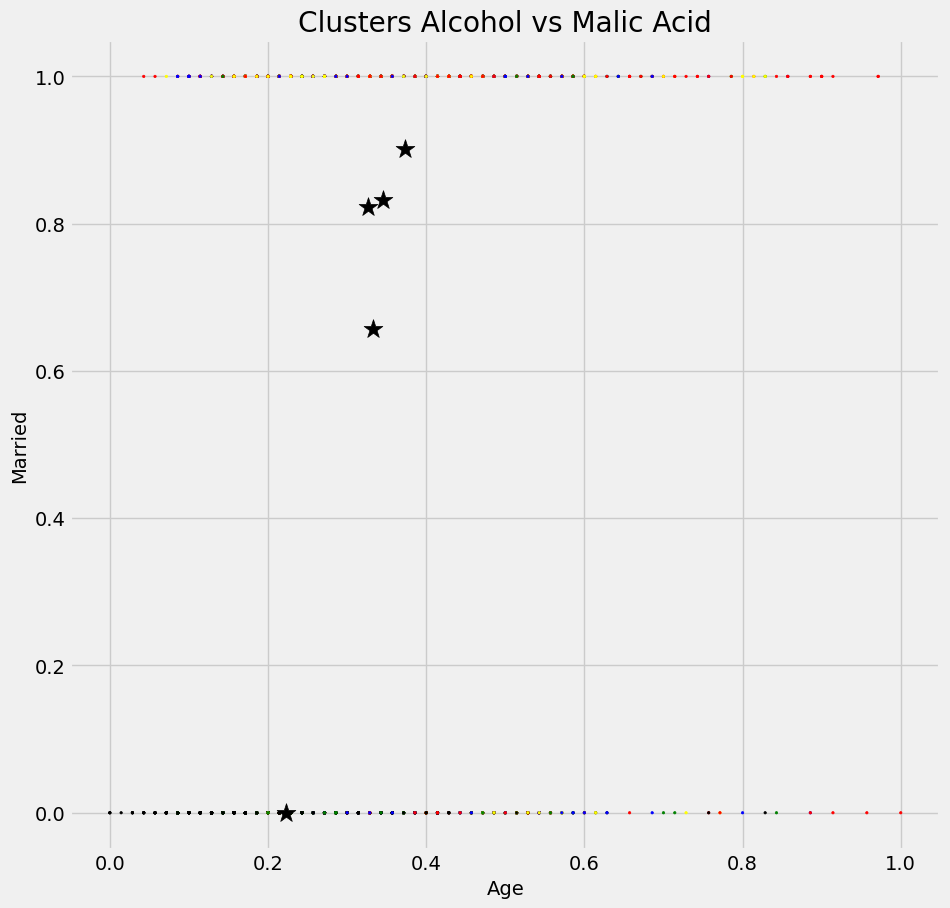

In [565]:
#%% Labeling the training data with groups founded
predict = kmeanModel.predict(X_clustering_norm)
#%% Plot k-means clustering. Normalized
colors=['red','green','blue','yellow','black']
assign=[]
for row in predict:
     assign.append(colors[row])
        
fig,ax=plt.subplots(figsize=(10,10))       
plt.scatter(X_clustering_norm.iloc[:,0], X_clustering_norm.iloc[:,12], c=assign, s=3)
plt.scatter(centroids[:, 0], centroids[:, 12], marker='*', c='black', s=200) # Centroids are marked.
plt.xlabel('Age')
plt.ylabel('Married')
plt.title('Clusters Age vs Married')
plt.show()


## HC


In [566]:
#Compute the linkage between all of the different points. Here we use a simple euclidean distance measure 
# and Ward's linkage, which seeks to minimize the variance between clusters.

X_tras_hc= X_clustering_norm.T
linkage_data = linkage(X_tras_hc, method='ward', metric='euclidean')

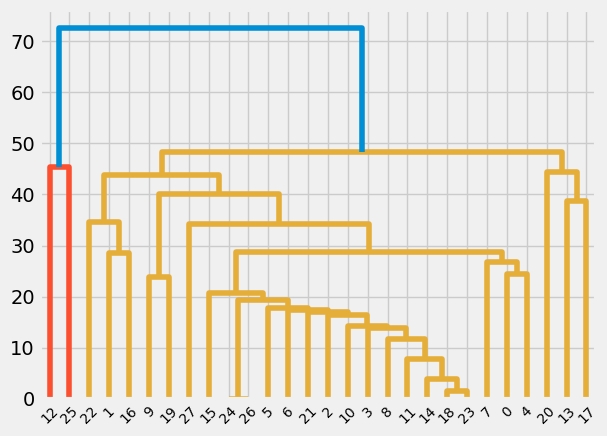

In [ ]:
# plotting the results in a dendrogram
dendrogram(linkage_data)
plt.savefig("Dendograma_traspuesto.jpg", bbox_inches='tight')
plt.show()

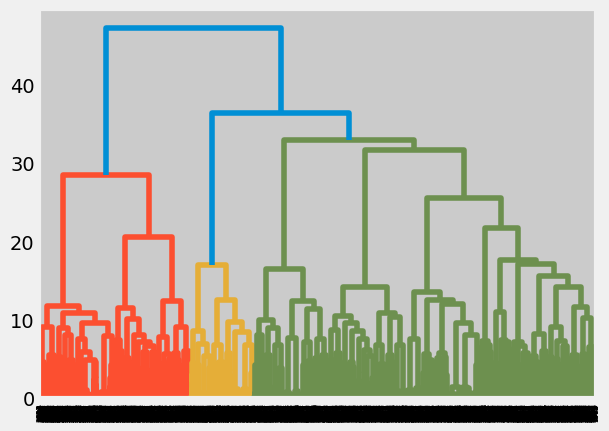

In [ ]:
linkage_data = linkage(X_clustering_norm, method='ward', metric='euclidean')
# plotting the results in a dendrogram
dendrogram(linkage_data)
plt.savefig("Dendograma_Datos.jpg", bbox_inches='tight')
plt.show()

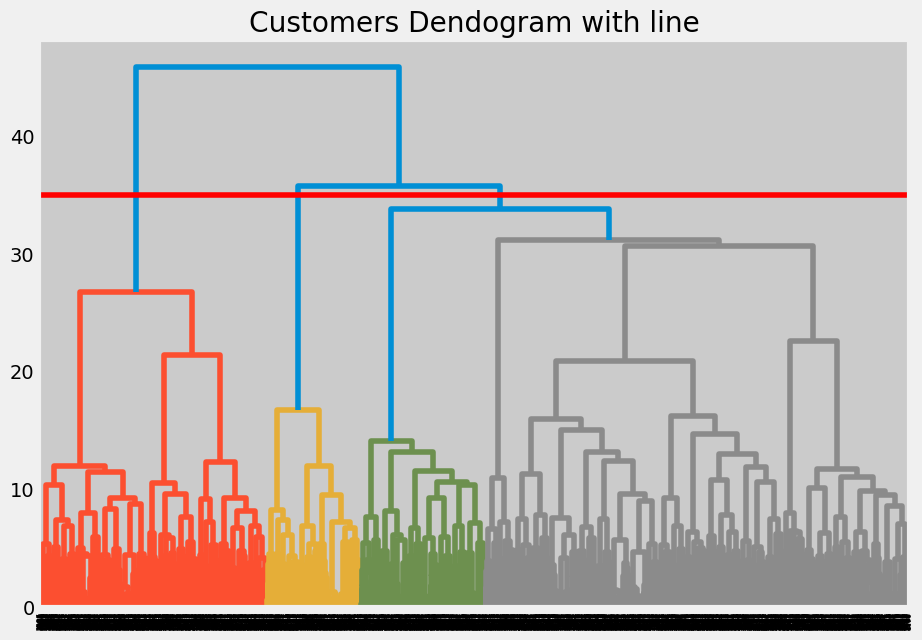

In [567]:
# Cutting to height 3.5

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customers Dendogram with line")
clusters = shc.linkage(data_norm, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 35, color = 'r', linestyle = '-')

In [ ]:

clustering_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clustering_model.fit(X_clustering_norm)
clustering_model.labels_

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:

print(collections.Counter(clustering_model.labels_))

Counter({0: 2998, 1: 1121})


Text(0.5, 1.0, 'Labeled Customer Data')

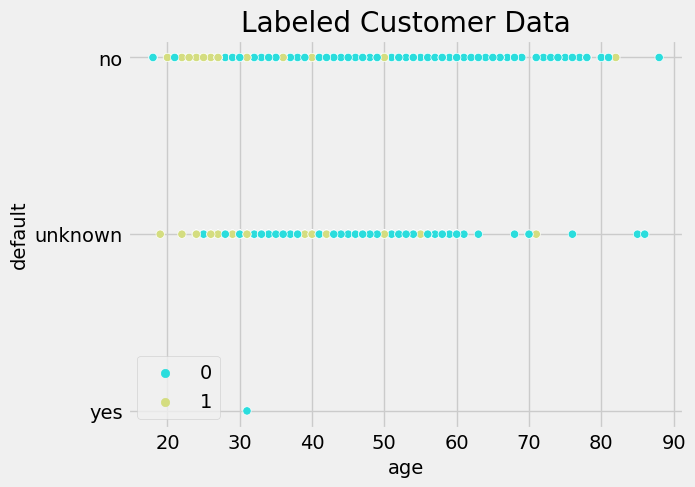

In [ ]:
# Representation of cases based on two attributes

data_labels = clustering_model.labels_
sns.scatterplot(x='age', 
                y='default', 
                data=data_clustering, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')

Text(0.5, 1.0, 'Labeled Customer Data')

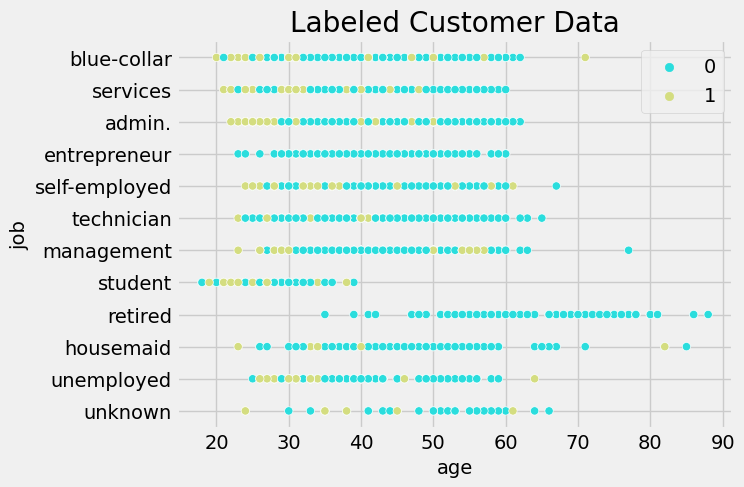

In [ ]:
# Representation of cases based on two attributes

data_labels = clustering_model.labels_
sns.scatterplot(x='age', 
                y='job', 
                data=data_clustering, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')